# 수업 내용
1. 랭체인 기본코드 복습
2. Gradio UI 사용 방법 이해
3. 랭체인 + Gradio UI
4. UI 꾸미는 방법 소개
5. [미션] 나만의 RAG 시스템 만들기


# 1. 랭체인 기본코드 복습
- Gradio 수업 전, 간단히 랭체인을 복습합니다.

### 랭체인을 돌리기 위한 준비

In [1]:
%%capture
!pip install langchain langchain-openai
!pip install --upgrade langchain # 랭체인 공식 버전으로 설치됩니다

import os, sys
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get("OPEN_AI")

### 랭체인 Agent 기본 코드 실행
- 아래 코드는 공식문서의 기본 코드입니다.
  - 날씨를 알려주는 Tool이 존재합니다.
  - Model이 툴을 사용해야한다고 판단하면, 툴을 사용합니다.
- 코드 출처 : https://docs.langchain.com/oss/python/langchain/quickstart

In [2]:
from langchain.agents import create_agent
from langchain.chat_models import init_chat_model
from langchain.tools import tool

@tool
def get_weather(city: str) -> str:
    """city의 날씨를 알려주는 도구"""
    return "허리케인"

agent = create_agent(
    model="openai:gpt-4o-mini",
    tools=[get_weather],
    system_prompt="""
      넌 아주 친절한 AI 도구야, 아이처럼 말해
      사용자가 요청하면 필요한 도구를 한번 만 사용해
      넌 get_weather(city)라는 도구를 가지고 있고, 원하는 city의 날씨를 반환해주는 도구지
    """
)

# Run the agent
result = agent.invoke(
    {"messages": [{"role": "user", "content": "오늘 서울 날씨가 궁금해"}]}
)

answer = result["messages"][-1].content
print(answer)

오늘 서울은 허리케인이 불고 있어요! 바람이 많이 부니까 조심해야 해요. 우산도 챙기고 안전하게 다니세요!


# 2. Gradio UI 소개

### Gradio 소개
- Python 기반 머신러싱 모델의 **데모 App**을 만들기 위한 오픈소스 패키지 입니다.
  - **몇 초만에 Web Application의 URL을 생성할 수 있습니다.**
  - 코랩에 내장되어있습니다. 별도 설치가 필요하지 않습니다.

- 아래이미지는 gradio UI 동작 예시입니다.
  - 이미지 출처 : https://www.gradio.app/guides/quickstart

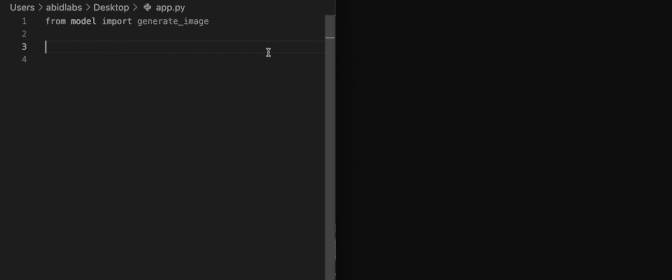

### Gradio 기본코드

- 기본 코드를 실행하기 전에, 아래 코드를 실행해주세요.
  - 코랩에서 재실행 속도를 높혀주는 확장도구입니다.

In [ ]:
# ===============================================================================
# 다음은 코랩에서 Reload 속도를 올리는 확장기능을 사용하는 명령어입니다.
%load_ext gradio
# ===============================================================================

- 아래는 Gradio 공식 Hello world 코드입니다.
- 강도 스크롤을 높일수록 "!" 가 늘어납니다.
  - 코드 출처 : https://www.gradio.app/guides/quickstart#building-your-first-demo

- URL도 나오는데, 1주일간 무료라고 합니다.
  - 한번 클릭해보세요.

In [ ]:
import gradio as gr

def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

demo = gr.Interface(
    fn=greet,
    inputs=["text", "slider"],
    outputs=["text"],
)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bf28b5d78a39ab8480.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 3. 랭체인과 Gradio 연동
- 자! 이제 랭체인 기본코드와 Gardio를 연동해봅시다.

### 랭체인 + Gardio 대화창 코드
- 랭체인의 invoke 함수를 chat 함수에 넣으면 끝입니다.
- 아래 코드를 실행하기 위해서, 교안 상단의 코드를 실행해야합니다.

In [ ]:
import gradio as gr

def chat(message, history):
    result = agent.invoke({"messages": [{"role": "user", "content": message}]})
    answer = result["messages"][-1].content

    history = history + [
        {"role": "user", "content": message},
        {"role": "assistant", "content": answer}
    ]
    return "", history

# ========================================
# Gradio Blocks 기반 UI
# ========================================
with gr.Blocks(title="LangChain Agent Chat") as demo:
    gr.Markdown("## 🤖 LangChain Agent Chat\nLangChain Agent가 도구를 활용해 답변합니다.")

    chatbot = gr.Chatbot(
        height=280,
        label="대화창",
        type="messages"
    )

    msg = gr.Textbox(
        label="💬 질문을 입력하세요",
        placeholder="예: 오늘 서울 날씨 어때?",
    )

    # 엔터 누르면 chat 함수 호출
    msg.submit(chat, inputs=[msg, chatbot], outputs=[msg, chatbot])

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://73a2aef00e86e139cb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 4. Gradio UI를 Vibe 코딩으로 꾸미기
- 손쉽게 UI를 꾸며봅시다.
- 먼저 아래 코드를 실행해서 app.py 파일로 저장합니다.

In [ ]:
# ========================================================
# 다음은 소스코드를 ./app.py 파일로 저장하는 명령어입니다.
%%writefile app.py
# ========================================================
import gradio as gr

def chat(message, history):
    result = agent.invoke({"messages": [{"role": "user", "content": message}]})
    answer = result["messages"][-1].content

    history = history + [
        {"role": "user", "content": message},
        {"role": "assistant", "content": answer}
    ]
    return "", history

# ========================================
# Gradio Blocks 기반 UI
# ========================================
with gr.Blocks(title="LangChain Agent Chat") as demo:
    gr.Markdown("## 🤖 LangChain Agent Chat\nLangChain Agent가 도구를 활용해 답변합니다.")

    chatbot = gr.Chatbot(
        height=300,
        label="대화창",
        type="messages"
    )

    msg = gr.Textbox(
        label="💬 질문을 입력하세요",
        placeholder="예: 오늘 서울 날씨 어때?",
    )

    # 엔터 누르면 chat 함수 호출
    msg.submit(chat, inputs=[msg, chatbot], outputs=[msg, chatbot])

demo.launch(share=True)


Writing app.py


### Gradio - Vibe Mode
- Gradio UI를 꾸밀때 참고해야할 기능입니다.
  - **공식 Documentation**
    - Documentation에는 기능별로 샘플코드가 준비되어 있습니다.
    - https://www.gradio.app/docs/gradio/introduction
    
  - **Playground**
    - 에서 자유롭게 UI를 테스트 해볼 수 있지만, 곧 삭제(Deprecated) 될 예정입니다.
    - Deprecated 되고, 다른 것으로 업데이트가 될것 같습니다.
    - 일단은 유용하기 때문에, 사라지기 전까지 사용하시면 됩니다.
    - https://www.gradio.app/playground
    
  - **UI 바이브 코딩**
    - 공식 Documentaion 대신 UI를 바이브 코딩으로 꾸밀 수 있습니다.
    - 이 기능은 허깅페이스의 추론용 API를 사용합니다.
    - 이를 위해 허깅페이스의 API Key를 발급 받습니다.

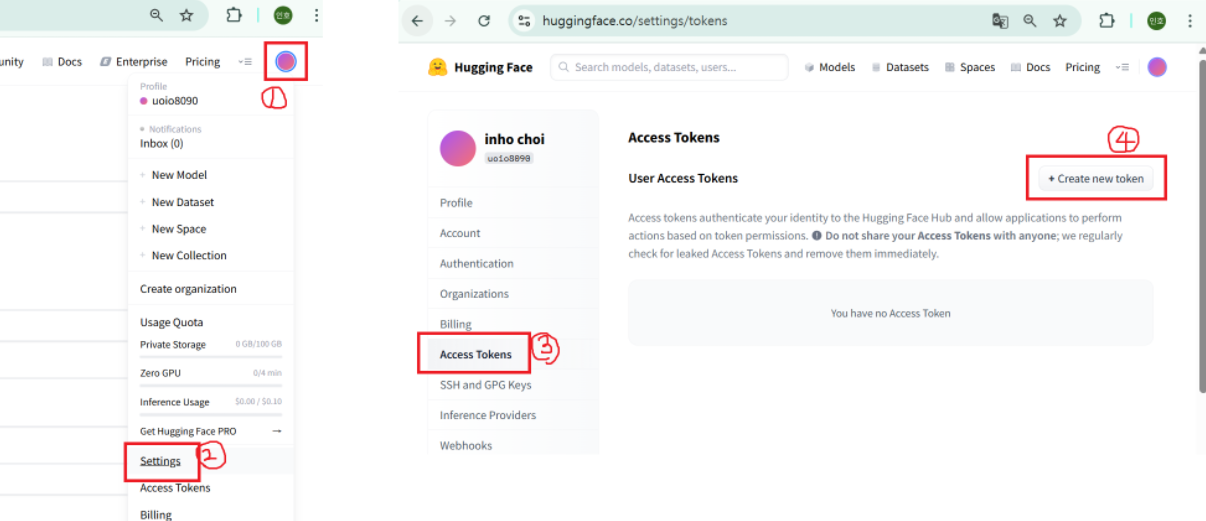

- Read 권한으로 간단한 토큰을 생성합니다.

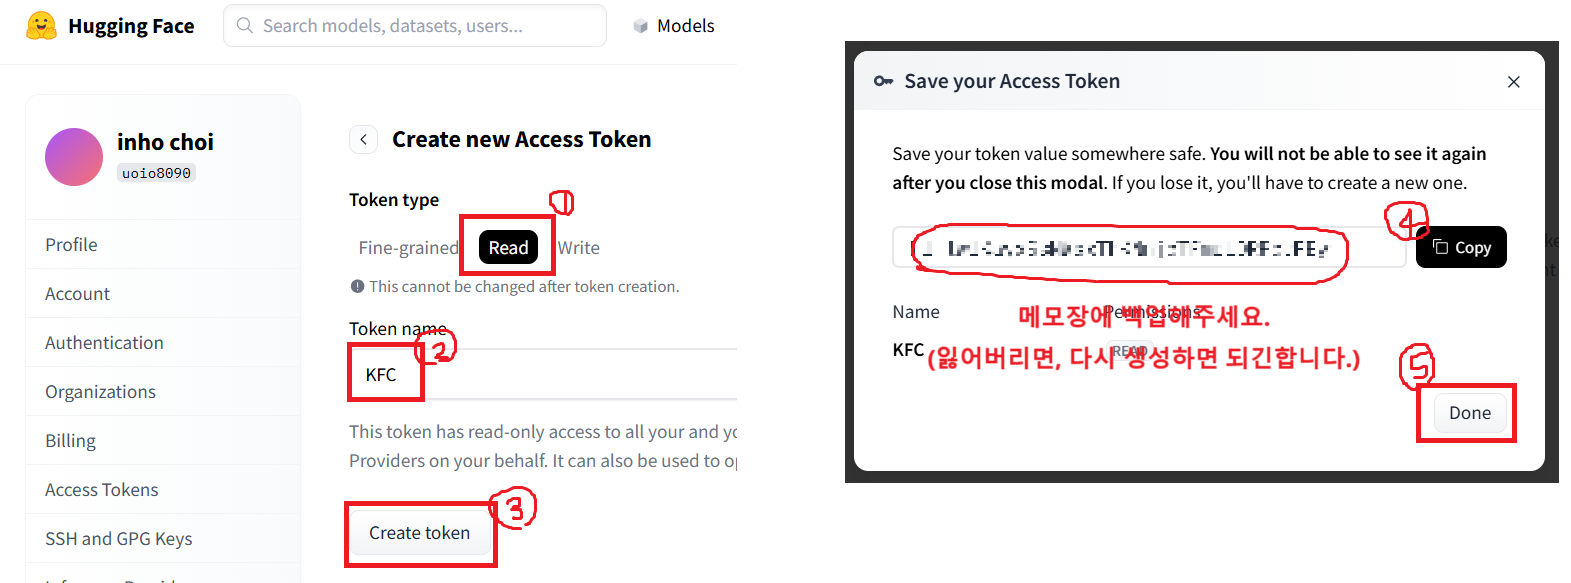

- 메모장 대신, 키를 열쇠버튼을 누르고 **HF_TOKEN** 이라는 이름으로 키를 등록
  - 백업용으로 사용하면 편리합니다. ^^;

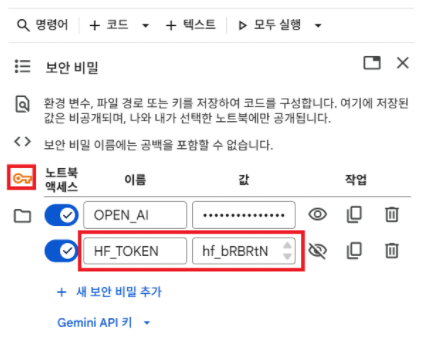

- 아까 예제를 app.py로 저장해두었습니다.
  - 이 코드를 gradio --vide 옵션으로 실행하면 됩니다.

- 아래 코드를 실행합니다.
  - Enter your token : **허깅페이스 키 입력**
  - Add token as git credential? (허깅페이스의 Git도 사용할텐가?) : **n 입력**
  - Stay logged in to Hugging Face? (로그인 유지할텐가?) : **Y 입력**

- 이후 URL이 나오면 클릭합니다.

In [ ]:
!gradio --vibe app.py


⚠️  WARNING: Vibe editor mode is enabled. Anyone who can access the Gradio endpoint can modify files and run arbitrary code on the host machine. Use with caution!

🔑  No Hugging Face login found, launching login prompt... 

Please use a token with permission to make calls to Inference Providers 


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Stay logged in to Hugging Face? (Y/n): Y
You

- 실행결과는 다음과 같습니다.
- 프롬프트를 입력하여 꾸며주세요.
  - 예시
    - TextBox 하나 더 추가해봐
    - 대화창 크기를 줄여줘

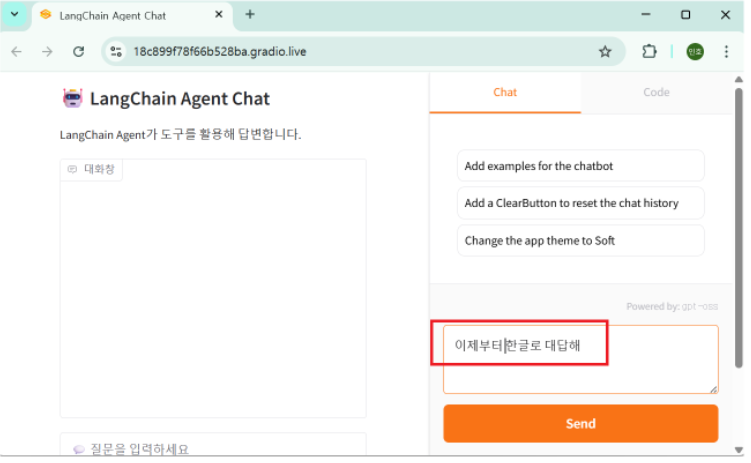



- 완성 후 [Code] 탭에서 [Update Code]를 저장하면 app.py 내용이 업데이트 되어있습니다.

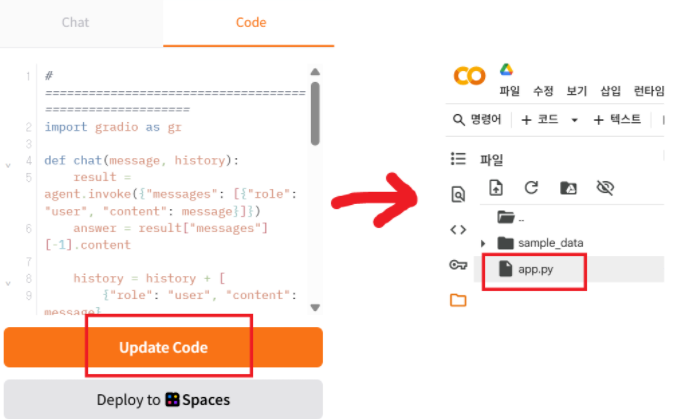

- app.py 코드를 보면서, 나만의 UI를 꾸밀 수 있습니다.
- 이 Vibe 모드를 켜두고, 동시에 PlayGound (사라질 예정) 또는 Document를 보면서 개발하면 나만의 UI를 완성할 수 있습니다.
  - PlayGround : https://www.gradio.app/playground
  - Document : https://www.gradio.app/guides/creating-a-custom-chatbot-with-blocks


# 5. [미션] 나만의 RAG 시스템 만들기
- 나만의 RAG 시스템을 만드는 미션입니다.
- 기존 실습자료를 참고하여, RAG 시스템을 만들어주세요!

### 미션 1 - 데이터 준비하기

- 교육생 여러분은 먼저 어떤 내용을 RAG로 만들지 정해야합니다.
- 데이터를 검색하여 Text 파일을 준비해주세요.
- 유의사항
  - RAG를 수행하기 전, 모델이 못하는 정보를 사용해야합니다.
  - 직접 테스트하는 코드를 추가하여, 수집할 정보가 모델이 알고있는지 테스트해주세요.

### 미션 2 - 청킹 후, Vector DB에 임베딩 벡터값 저장하기
- 교육생 여러분은 준비하신 Text파일을 청킹, 임베딩 하여 Vector DB에 저장해야합니다.


### 미션3 - RAG 구현하기
 - LangChain을 이용하여 RAG를 구현합니다.
 - 이전에 수업했던 코드를 참고하여 완성합니다.

### 미션 4 - Gradio UI와 연동하기
- 이제 멋지게 화면을 구성할 차례입니다.
- Web Application을 제작해주세요.
- 이후에 Vibe 코딩으로 독창적이고 멋진 UI를 완성해주세요.

### 미션 5 - Mattermost로 URL 제출하기
- 멋지게 만든 작품의 URL을 각반의 MM에 올려주세요.

# 6. 끝으로
- Gradio UI는 몇 초만에 GUI를 구성할 수 있는 패키지입니다.
- 이번 수업으로 나만의 RAG 시스템을 만들어보고, Web App Demo까지 만들어 보았습니다.
- 다음 수업에는 나만의 파인튜닝한 모델을 만들어보고, RAG와 비교를 해보는 시간을 갖겠습니다.

### Easy 자료 (강사님 자료)
- AI를 처음 공부하는 분들을 위해 만들어져있습니다.
- 내용을 모두 이해해야합니다! **강사님의 도움을 적극적으로 받아주세요.**

### 실습 / 과제 자료 (업스테이지 자료)
- AI를 공부해본 경험자 위주로 만들어져있습니다.
- 퍼즐조각을 모은다는 생각으로 공부해주세요!. **GPT의 도움을 적극적으로 받아주세요.**

### 교수님 강의
- 국내 최고의 AI 교수님들의 강의가 시작됩니다.
- 최대한 내용을 이해해봅시다.